In [80]:
import pandas as pd
import numpy as np
import os
from ete3 import NCBITaxa
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
DATA_PATH = '../data'
FILENAME = 'api-output-collapsed-with-categories.csv'

In [77]:
metadata_df = pd.read_csv(os.path.join(DATA_PATH, FILENAME), header=1)


In [56]:
processed_file_count = 0
for index, row in metadata_df.iterrows():
    if 'Processed' in row['category']:
        processed_file_count += 1
print('Total Processed files = ', processed_file_count)

Total Processed files =  309


# Count of study assay technology type

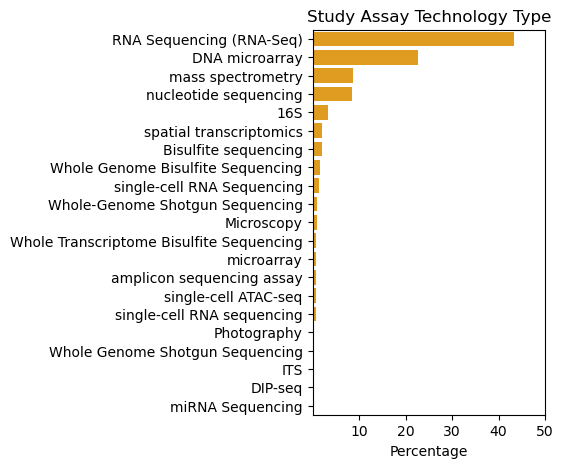

In [75]:
counts = metadata_df['study assay technology type'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

plt.figure(figsize=(3, 5))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Study Assay Technology Type')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xticks(range(10, 51, 10))

plt.show()


# Organism counts

## Get Kingdom and Superkingdom of Organism used in the assay

In [168]:
ncbi = NCBITaxa()
lineage_superkingdom = [None]*metadata_df.shape[0]
lineage_kingdom = [None]*metadata_df.shape[0]
for index, row in metadata_df.iterrows():
    try:
        tax_id = row['organism.term accession number'].split('/')[-1]
        lineage = ncbi.get_lineage(tax_id)
        lineage_names = ncbi.get_taxid_translator(lineage)
        for item in lineage_names:
            rank = list(ncbi.get_rank([item]).values())[0]
            if rank == 'superkingdom':
                lineage_superkingdom[index] = lineage_names[item]
            if rank == 'kingdom':
                lineage_kingdom[index] = lineage_names[item]
    except:
        continue
metadata_df.loc[:, 'lineage_superkingdom'] = lineage_superkingdom
metadata_df.loc[:, 'lineage_kingdom'] = lineage_kingdom


## i. Count of Organism at Superkingdom level

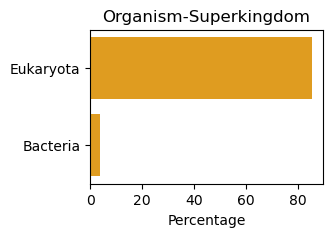

In [171]:
counts = metadata_df['lineage_superkingdom'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

plt.figure(figsize=(3, 2))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Organism-Superkingdom')
plt.xlabel('Percentage')
plt.ylabel('')
# plt.xticks(range(10, 61, 10))

plt.show()


## ii. Count of Organism at Kingdom level

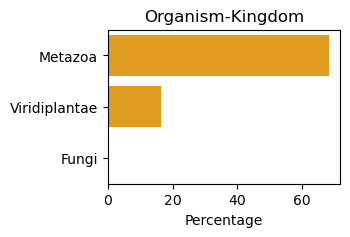

In [172]:
counts = metadata_df['lineage_kingdom'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

plt.figure(figsize=(3, 2))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Organism-Kingdom')
plt.xlabel('Percentage')
plt.ylabel('')
# plt.xticks(range(10, 61, 10))

plt.show()


## iii. Count of Organism at granular level

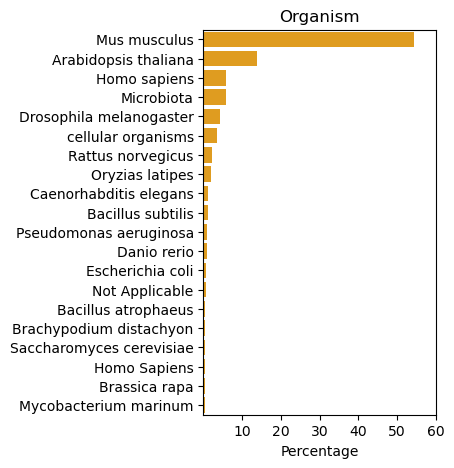

In [173]:
counts = metadata_df['organism'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

plt.figure(figsize=(3, 5))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Organism')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xticks(range(10, 61, 10))

plt.show()


# Count of Material type used for the study

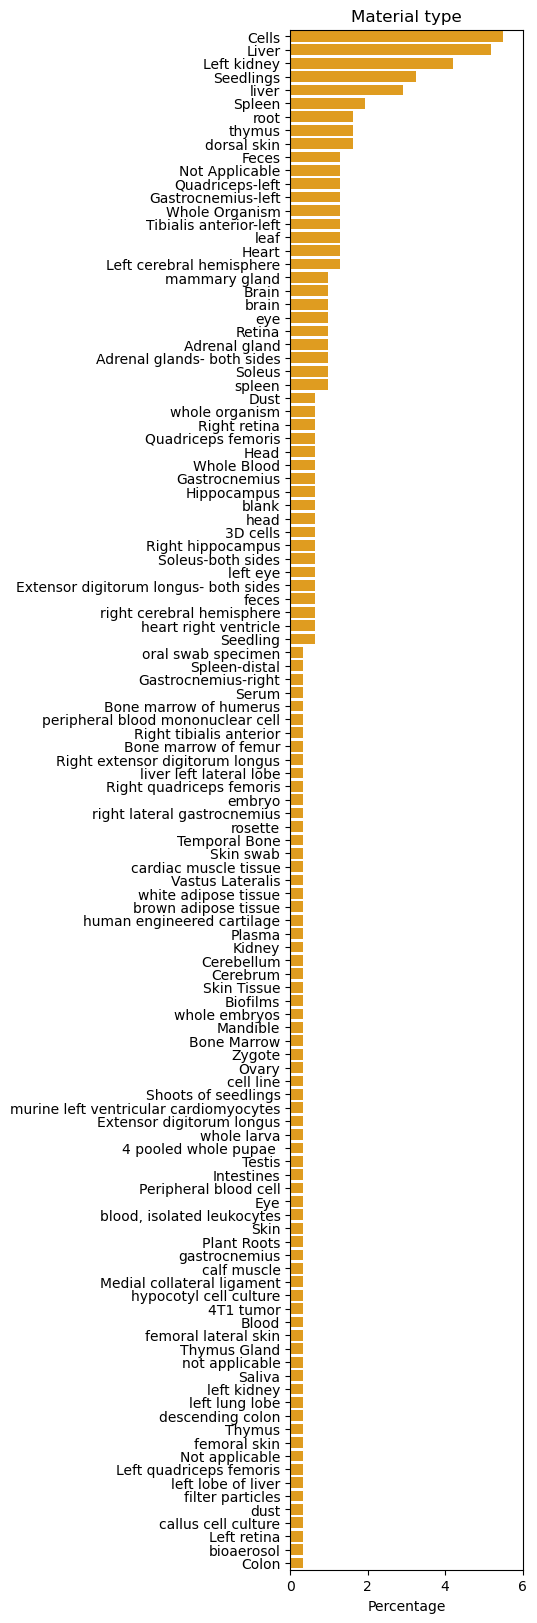

In [74]:
counts = metadata_df['material type'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

plt.figure(figsize=(3, 20))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Material type')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xticks(range(0, 7, 2))

plt.show()
